In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/spam.csv",encoding='latin1')

In [3]:
data_copy = data.copy()

In [4]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2420,ham,Oic... Then better quickly go bathe n settle d...,NaN,NaN,NaN
1778,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...,NaN,NaN,NaN
732,ham,Lol you won't feel bad when I use her money to...,NaN,NaN,NaN
1109,ham,S s..first time..dhoni rocks...,NaN,NaN,NaN
2180,ham,Babe ! How goes that day ? What are you doing ...,NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
 data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(403)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
new_df = data[['v1','v2']].copy()

In [11]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
new_df.iloc[2].v2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [13]:
new_df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
new_df.sample(5)

,target,text
1744,spam,Someone has conacted our dating service and en...
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...
3137,ham,Wat r u doing now?
2221,ham,I notice you like looking in the shit mirror y...
414,spam,100 dating service cal;l 09064012103 box334sk38ch


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
new_df['target'] = encoder.fit_transform(new_df['target'])

In [18]:
new_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
new_df.duplicated().sum()

np.int64(0)

In [20]:
new_df.isna().sum()

target    0
text      0
dtype: int64

<h1>EDA</h1

In [21]:
import matplotlib.pyplot as plt

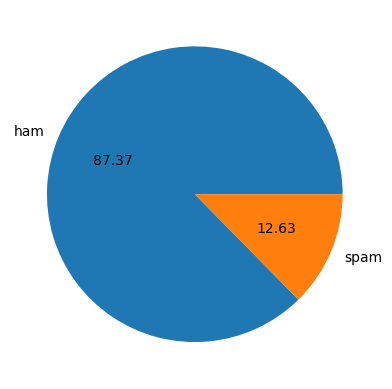

In [22]:
plt.pie(new_df['target'].value_counts() , labels=['ham','spam'],autopct = '%0.2f')
plt.show()

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
new_df['num_characters'] = new_df['text'].apply(len)

In [25]:
new_df.sample()

,target,text,num_characters
4868,0,1. Tension face 2. Smiling face 3. Waste face ...,158


In [26]:
new_df['num_words'] = new_df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
new_df['num_sentences'] = new_df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

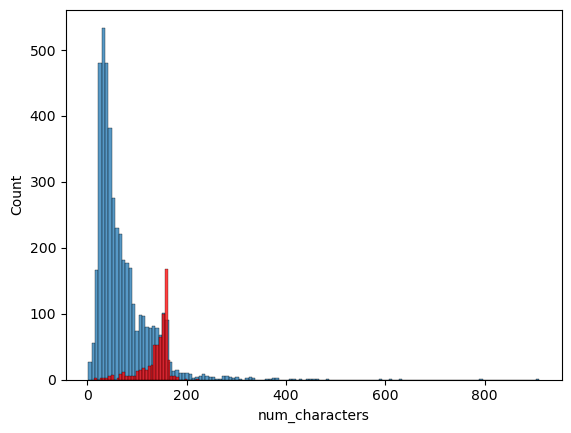

In [29]:
sns.histplot(new_df[new_df['target'] == 0]['num_characters'])
sns.histplot(new_df[new_df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

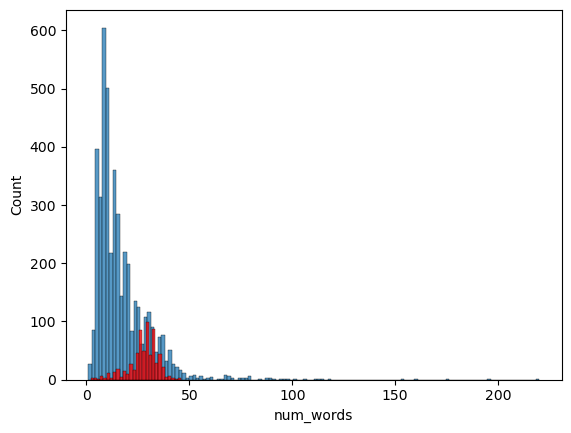

In [30]:
sns.histplot(new_df[new_df['target'] == 0]['num_words'])
sns.histplot(new_df[new_df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

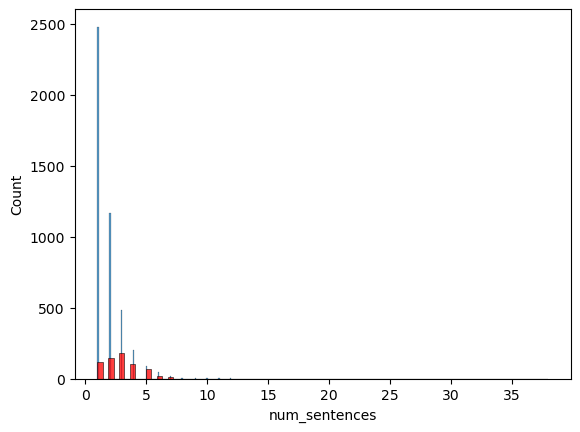

In [31]:
sns.histplot(new_df[new_df['target'] == 0]['num_sentences'])
sns.histplot(new_df[new_df['target'] == 1]['num_sentences'],color='red')

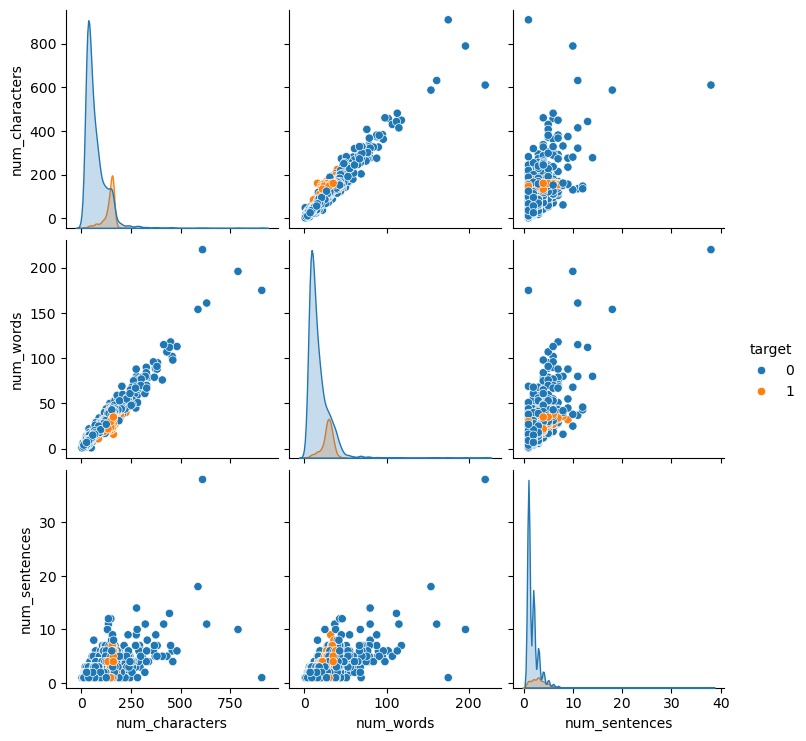

In [32]:
sns.pairplot(new_df,hue='target')

<Axes: >

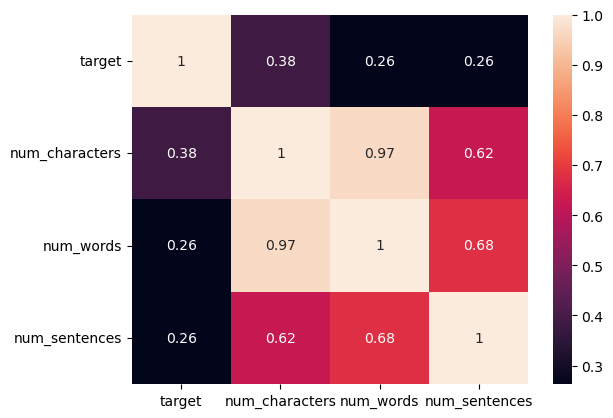

In [33]:
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)


In [34]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    text = l.copy()
    l.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(ps.stem(i))
    return " ".join(l)
            
    

In [47]:
transform_text('I loved the YT lectures on Machine Learning?')

'love yt lectur machin learn'

In [48]:
new_df['text'] = new_df['text'].apply(transform_text)

In [56]:
new_df['text'].sample(5)

3350                                      time come
1409                                         hungri
1955             aight grab someth eat text back mu
4786                         ìï thk wat eat tonight
5177    strang watch 2nd one bed sweet dream miss u
Name: text, dtype: object

In [57]:
new_df['text'][2745]

'r go 4 today meet'

In [61]:
!pip install wordcloud

In [70]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')

In [71]:
spam_wc = wc.generate(new_df[new_df['target'] == 1]['text'].str.cat(sep=' '))

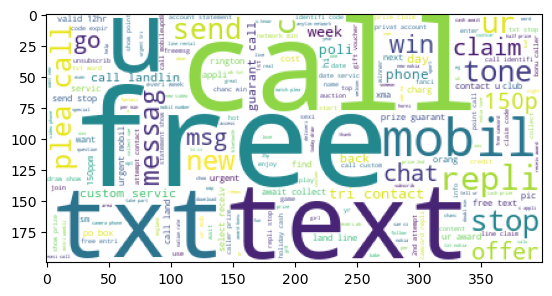

In [72]:
plt.imshow(spam_wc)